#### Importando as bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### Importando a base de dados

In [2]:
dataset = pd.read_csv('C:\\Users\\Fabiel Fernando\\Desktop\\PROVA\\agrupamento_Q1.csv')
dataset.head()

,X1,X2,X3,X4
0,-0.075701,0.470857,0.133139,-0.152900
1,-0.328561,0.427323,-0.181237,-0.173041
2,-0.470727,-0.150515,0.000954,0.070937
3,-0.280037,-0.250587,-0.216587,-0.372430
4,-0.139359,-0.124966,0.081284,0.083914


In [3]:
dataset2 = pd.read_csv('C:\\Users\\Fabiel Fernando\\Desktop\\PROVA\\agrup_centroides_Q1.csv')
dataset2 = dataset2.iloc[:, 1:5]
dataset2.head()

,X1,X2,X3,X4
0,1.488531,-0.430586,0.208942,0.018485
1,0.149391,1.549535,0.219688,0.917854
2,1.276714,0.844500,1.211906,-0.494781
3,-0.224172,-0.265252,1.004367,-0.209741
4,0.059576,0.946101,1.114006,0.401051


#### Usando gráfico de cotovelo para estimar o número de clusters

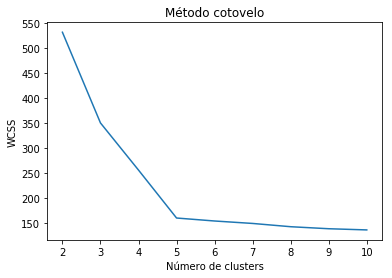

In [4]:
from sklearn.cluster import KMeans

wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init=np.array(dataset2.iloc[0:i, :],np.float64), max_iter=10, n_init=1, random_state=42)
    kmeans.fit(dataset)
    wcss.append(kmeans.inertia_)

plt.plot(range(2, 11), wcss)
plt.title('Método cotovelo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()


#### Aplicando k-means

In [5]:
inicializar = dataset2.iloc[0:5]
inicializar.shape

(5, 4)

In [6]:
inicializar

,X1,X2,X3,X4
0,1.488531,-0.430586,0.208942,0.018485
1,0.149391,1.549535,0.219688,0.917854
2,1.276714,0.844500,1.211906,-0.494781
3,-0.224172,-0.265252,1.004367,-0.209741
4,0.059576,0.946101,1.114006,0.401051


In [7]:
kmeans = KMeans(n_clusters=5, init=inicializar, max_iter=10, n_init=1, random_state=42)
y_kmeans = kmeans.fit_predict(dataset)

In [8]:
pd.DataFrame(kmeans.cluster_centers_)

,0,1,2,3
0,1.008097,0.005656,-0.006059,0.029329
1,0.995562,0.000626,-0.007804,1.001521
2,0.995953,0.006463,0.999718,0.003147
3,-0.034715,0.016316,0.010426,-0.016241
4,0.990740,0.993048,0.969937,-0.004065


#### Visualizando os clusters

In [9]:
X = np.array(dataset.iloc[:, :])

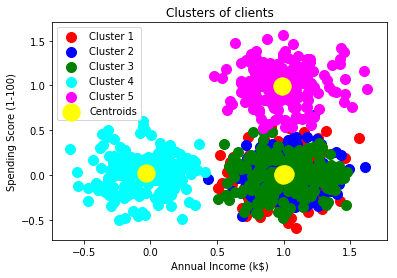

In [10]:
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X[y_kmeans==4, 0], X[y_kmeans==4, 1], s=100, c='magenta', label='Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of clients')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

#### Selecionando o número de clusters com análise da Silhueta

In [11]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [12]:
for i in range(2,11): 
    kmeans2 = KMeans(n_clusters=i, init=np.array(dataset2.iloc[0:i, :],np.float64), max_iter=10, n_init=1, random_state=42)
    kmeans2.fit(dataset)
    preds = kmeans2.predict(dataset)
    centers = kmeans2.cluster_centers_

    score = silhouette_score(dataset, preds, metric='euclidean')
    print("Para n clusters = {}, silhouette score is : {})".format(i, score))

Para n clusters = 2, silhouette score is : 0.3776996894632227)
Para n clusters = 3, silhouette score is : 0.4311863724028486)
Para n clusters = 4, silhouette score is : 0.43674367398097297)
Para n clusters = 5, silhouette score is : 0.4870121458428754)
Para n clusters = 6, silhouette score is : 0.41267403204713576)
Para n clusters = 7, silhouette score is : 0.41521227379123654)
Para n clusters = 8, silhouette score is : 0.3640595542115239)
Para n clusters = 9, silhouette score is : 0.3621266685160374)
Para n clusters = 10, silhouette score is : 0.36140207766995297)


In [13]:
inicializar = dataset2.iloc[0:5]

In [14]:
kmeans3 = KMeans(n_clusters=5, init=inicializar, max_iter=10, n_init=1, random_state=42)
y_kmeans = kmeans3.fit_predict(dataset)


In [15]:
pd.DataFrame(kmeans3.cluster_centers_)

,0,1,2,3
0,1.008097,0.005656,-0.006059,0.029329
1,0.995562,0.000626,-0.007804,1.001521
2,0.995953,0.006463,0.999718,0.003147
3,-0.034715,0.016316,0.010426,-0.016241
4,0.990740,0.993048,0.969937,-0.004065
